# ********* Loan Application Status Prediction*******

Name:- Sourabh Solanki
    
Batch:- DS2403



Project Description


This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:
    
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.


12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset


# Importing Libraries

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')

# Load Dataset

In [290]:
df = pd.read_csv('loan_data.csv')

In [291]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [292]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [293]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Exploratory Data Analysis(EDA)

In [294]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [296]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [297]:
df.nunique()

Loan_ID              381
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      322
CoapplicantIncome    182
LoanAmount           101
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [298]:
for i in df.columns:
    print(df[i].value_counts())
    print('='*100)

Loan_ID
LP001003    1
LP002281    1
LP002314    1
LP002308    1
LP002305    1
           ..
LP001698    1
LP001693    1
LP001692    1
LP001691    1
LP002990    1
Name: count, Length: 381, dtype: int64
Gender
Male      291
Female     85
Name: count, dtype: int64
Married
Yes    228
No     153
Name: count, dtype: int64
Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64
Education
Graduate        278
Not Graduate    103
Name: count, dtype: int64
Self_Employed
No     325
Yes     35
Name: count, dtype: int64
ApplicantIncome
2500    8
2600    5
4583    4
2583    4
3750    4
       ..
150     1
3850    1
3430    1
2479    1
4106    1
Name: count, Length: 322, dtype: int64
CoapplicantIncome
0.0       175
1666.0      4
2500.0      4
1459.0      3
1800.0      3
         ... 
1083.0      1
3021.0      1
983.0       1
1775.0      1
1950.0      1
Name: count, Length: 182, dtype: int64
LoanAmount
120.0    19
110.0    16
100.0    15
128.0    11
113.0    11
         ..
59.0    

In [299]:
df.drop(columns='Loan_ID', inplace=True)

In [300]:
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [301]:
#removing null values
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [302]:
df['Dependents']=df['Dependents'].fillna(0)
df['Credit_History']=df['Credit_History'].fillna(0)

In [303]:
df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']),inplace=True)

In [304]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Visualization

In [305]:
#seprating cat and num
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print('Categorical Columns: ',cat_col)
print('\n')

num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!= 'object':
        num_col.append(i)
print('Numerical Columns:',num_col)


Categorical Columns:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical Columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


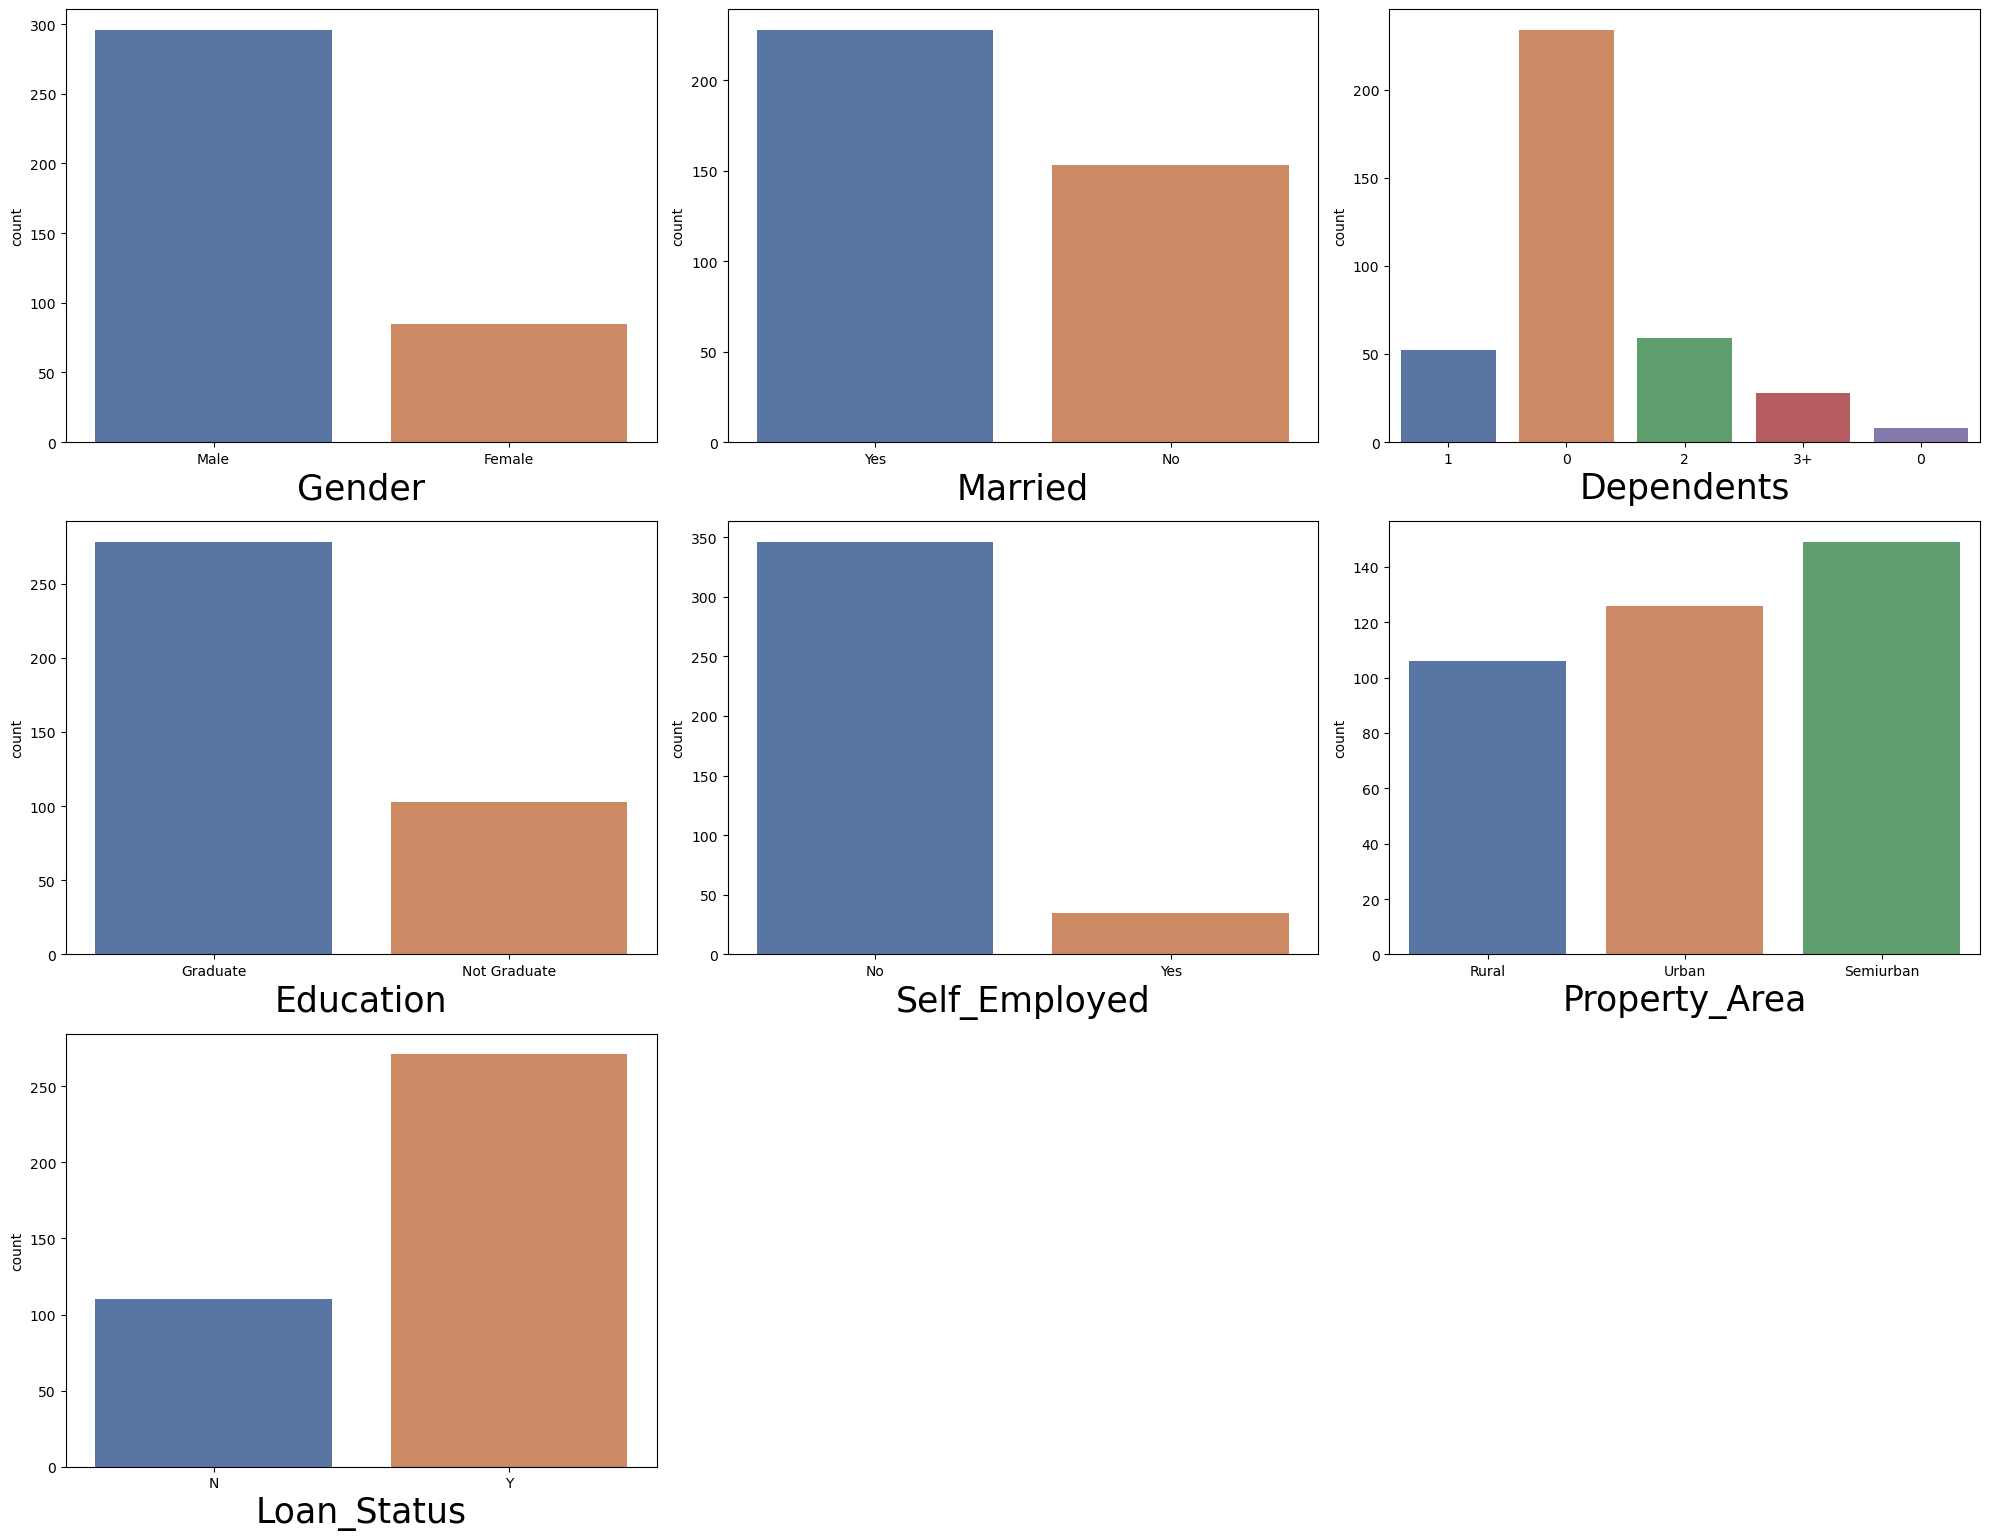

In [306]:
sns.set_palette('deep')
plt.figure(figsize=(20,20), facecolor='white')

for i, col in enumerate(cat_col, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=col)
    plt.xlabel(col, fontsize=25)

plt.tight_layout()
plt.show()


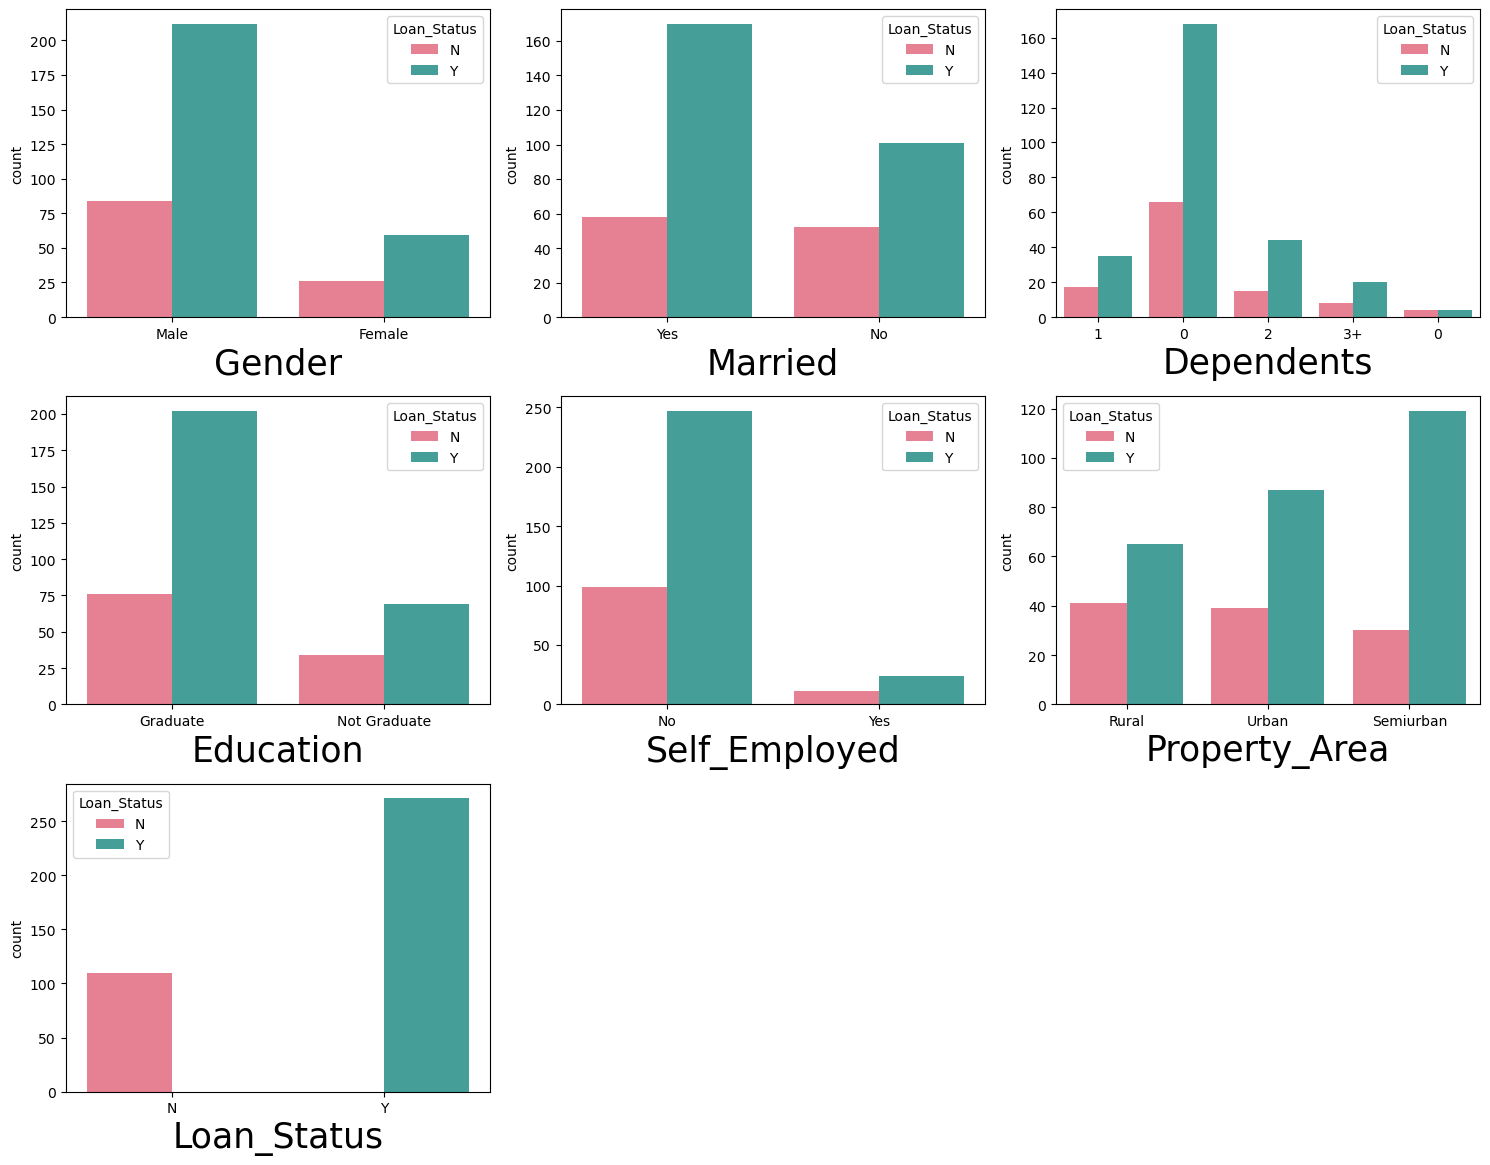

In [307]:
plt.figure(figsize=(15,15))

for i, col in enumerate(cat_col, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=col,hue='Loan_Status',palette='husl')
    plt.xlabel(col, fontsize=25)

plt.tight_layout()
plt.show()
    

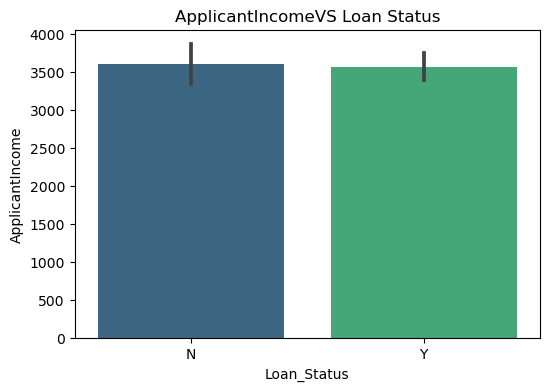

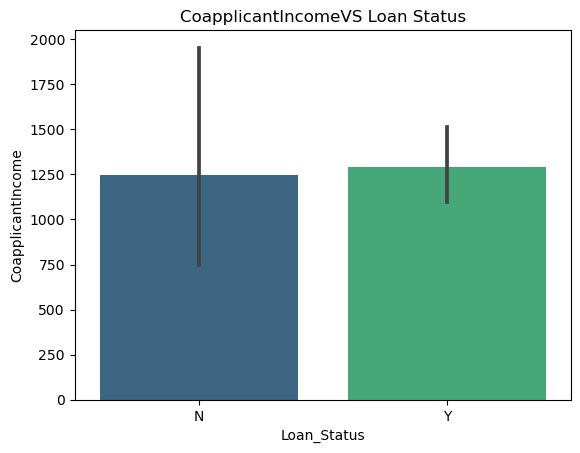

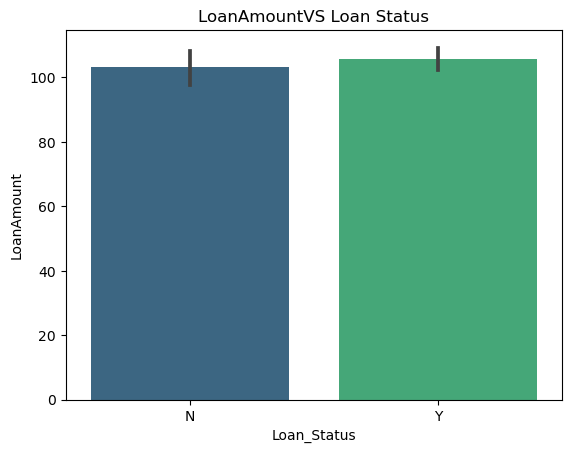

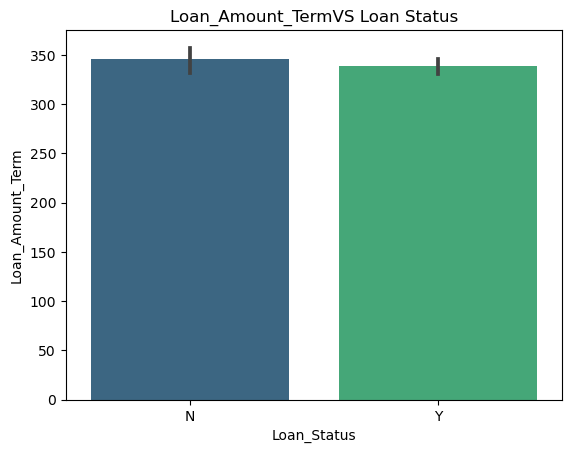

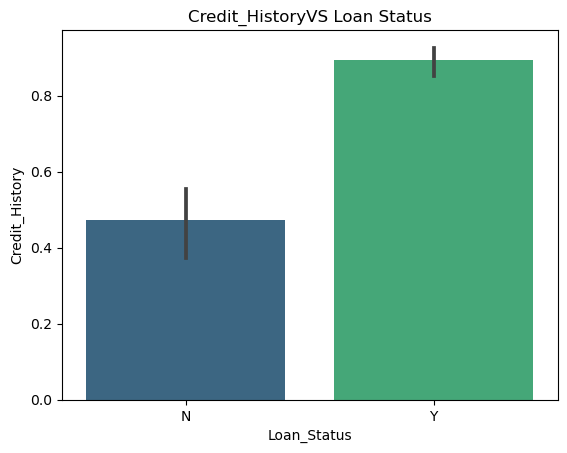

In [308]:
plt.figure(figsize=(6,4))
for col in num_col:
    plt.title(col+'VS Loan Status')
    sns.barplot(y=col,x='Loan_Status',data=df,palette='viridis')
    plt.show()
    

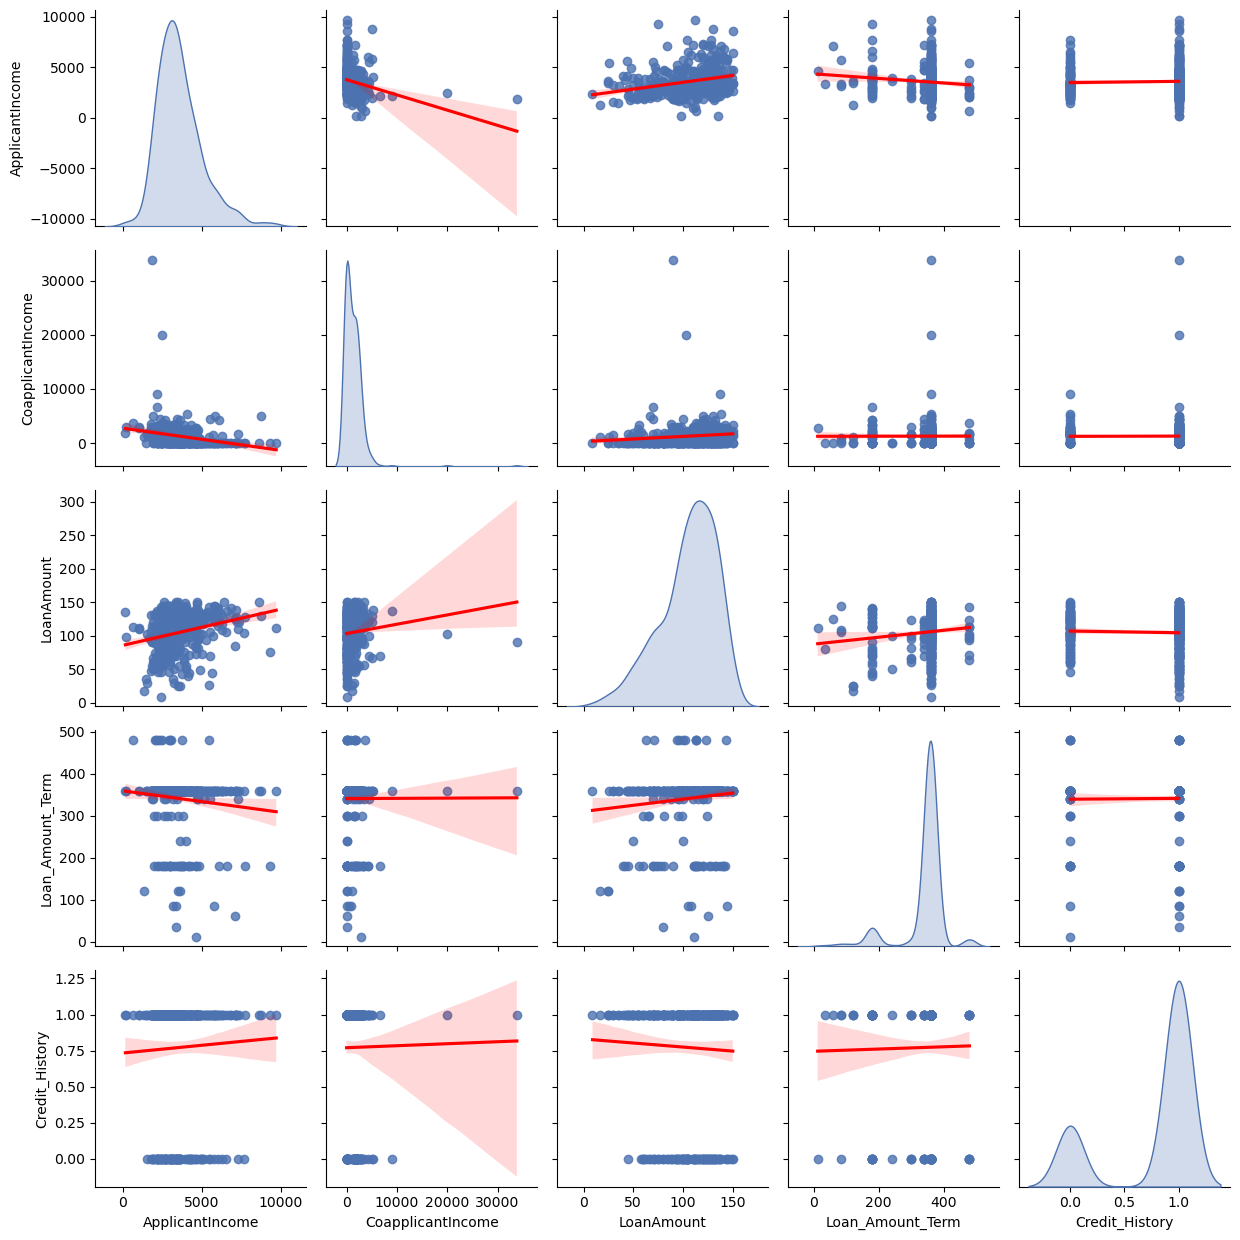

In [309]:
sns.pairplot(df,kind='reg',diag_kind='kde',plot_kws={'line_kws':{'color':'red'}})
plt.tight_layout()
plt.show()

# Encoding

In [310]:

from sklearn.preprocessing import LabelEncoder

In [311]:
le=LabelEncoder()
encode_col=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for i in encode_col:
    df[i]=le.fit_transform(df[i])

In [312]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [313]:
df['Dependents'] = df.Dependents.map({'0':0, '1':1, '2':2, '3+':3})

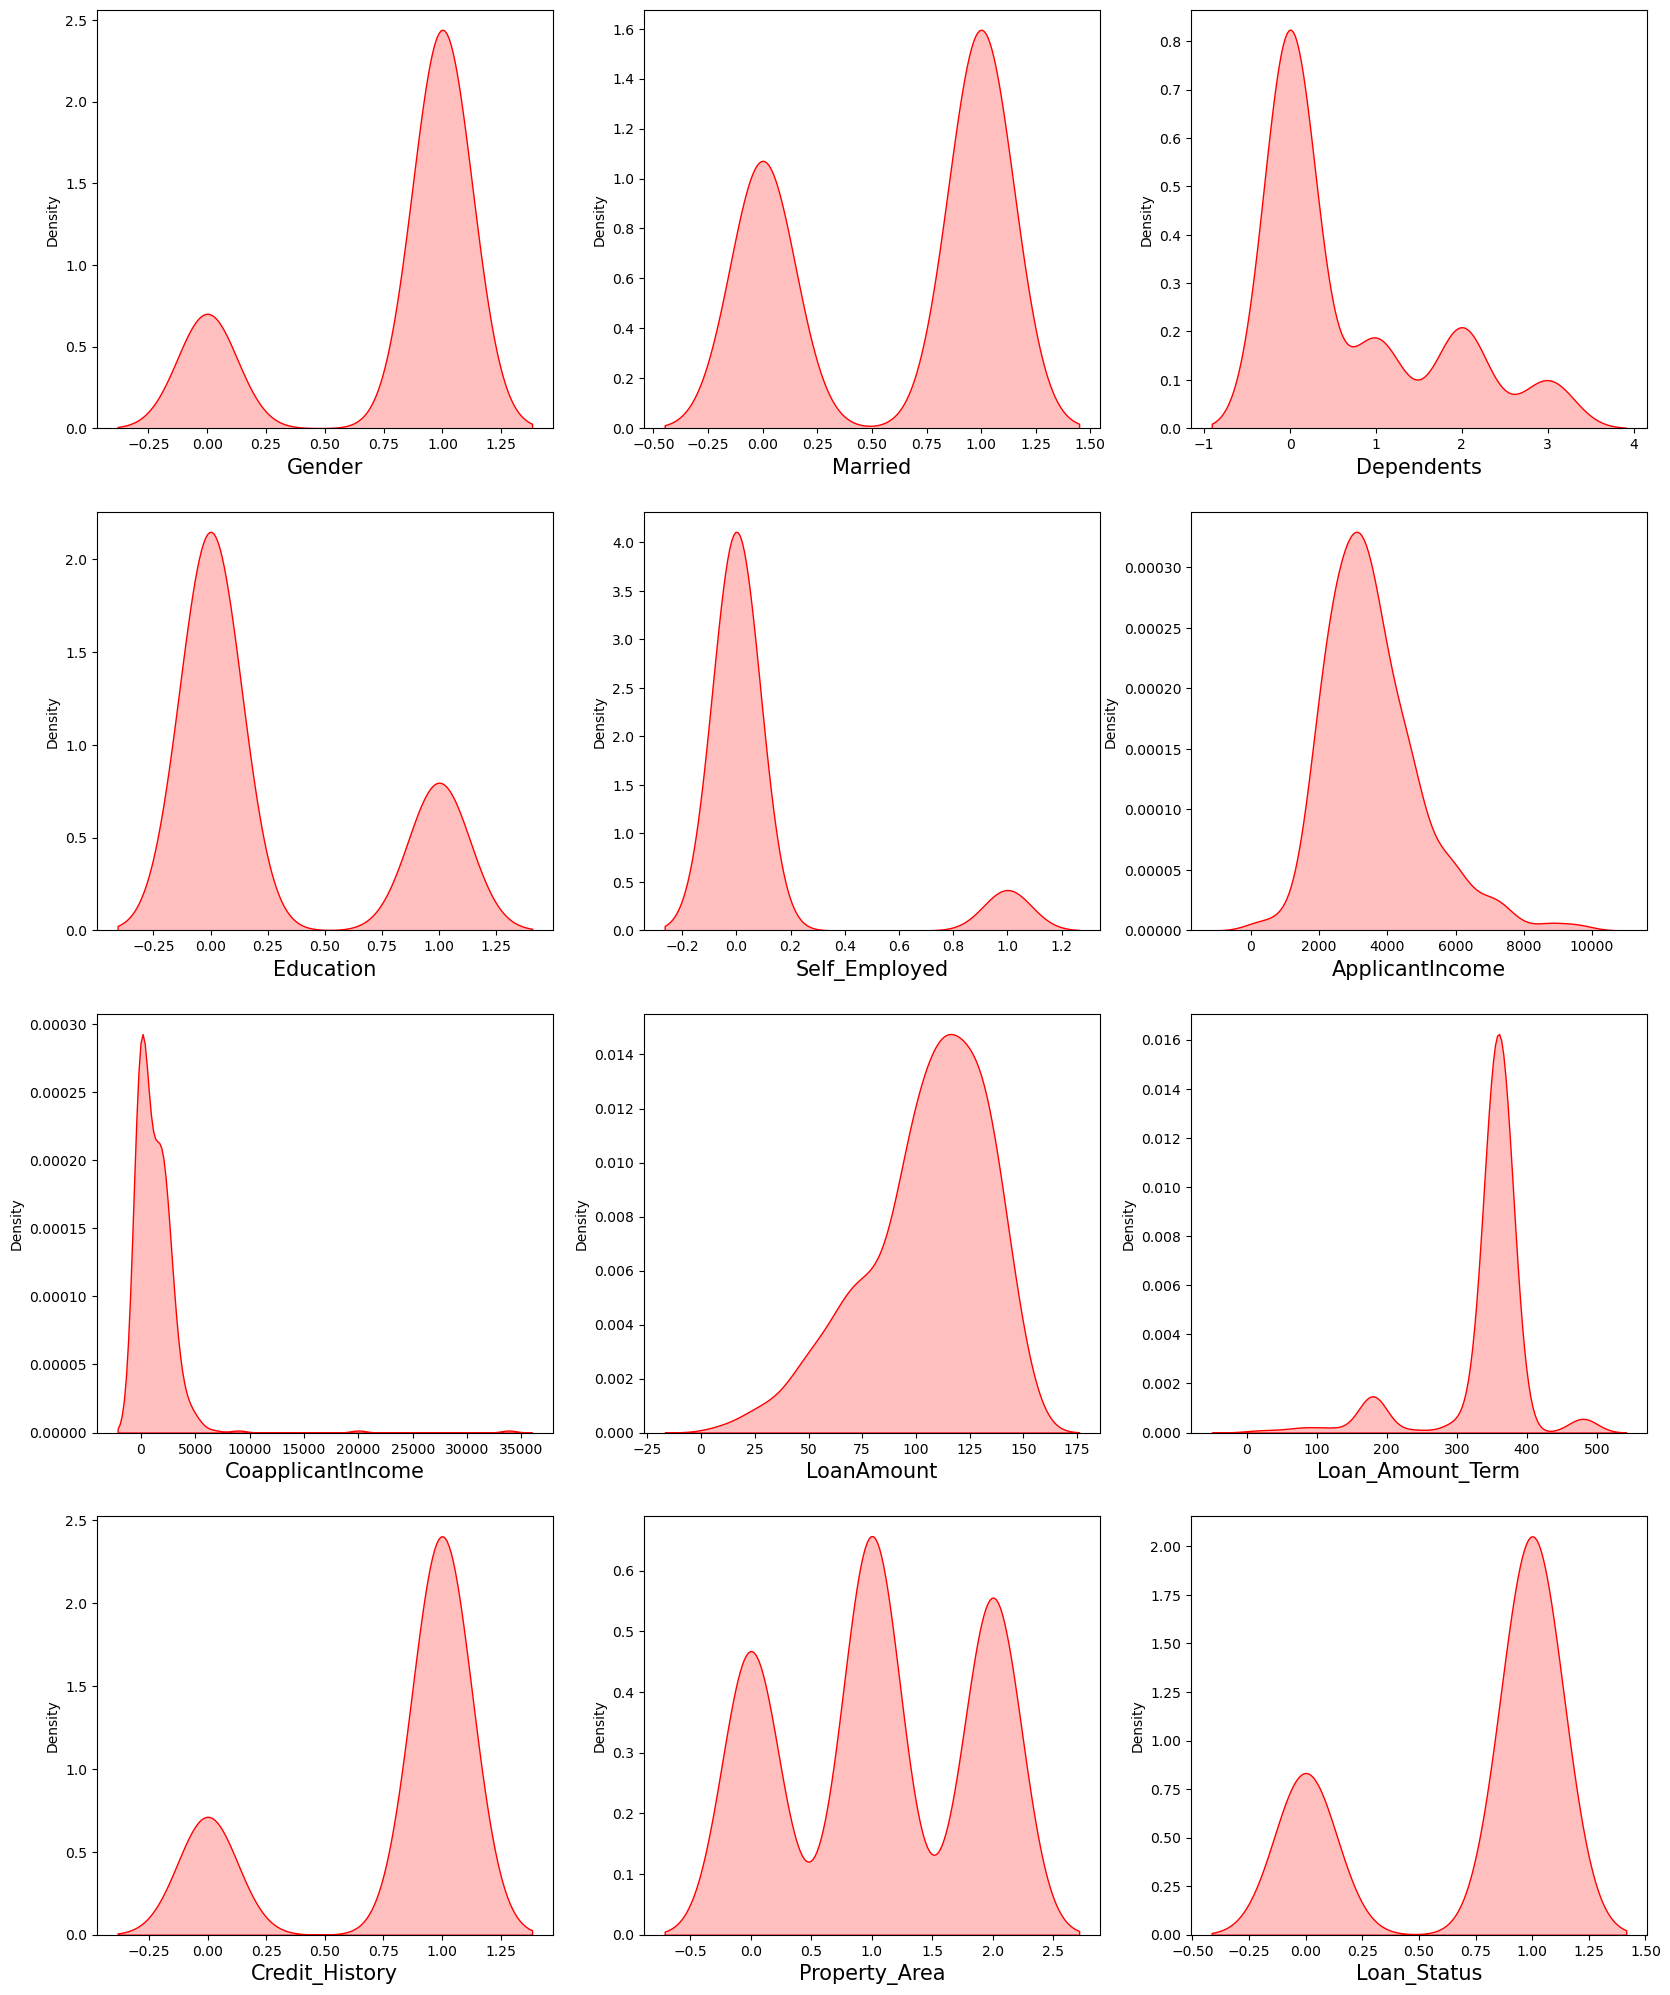

Gender              -1.335495
Married             -0.403147
Dependents           1.137279
Education            1.038274
Self_Employed        2.837288
ApplicantIncome      1.119751
CoapplicantIncome    8.660692
LoanAmount          -0.804282
Loan_Amount_Term    -2.237203
Credit_History      -1.299428
Property_Area       -0.091709
Loan_Status         -0.936181
dtype: float64


In [314]:
#checking Skewness

plt.figure(figsize=(20,25), facecolor='white')
pltnum=1
for col in df:
    if pltnum<=12:
        ax=plt.subplot(4,3,pltnum)
        sns.distplot(df[col],color='red',hist=False,kde_kws={'shade':True})
        plt.xlabel(col,fontsize=15)
        pltnum+=1 
plt.show()
print(df.skew())

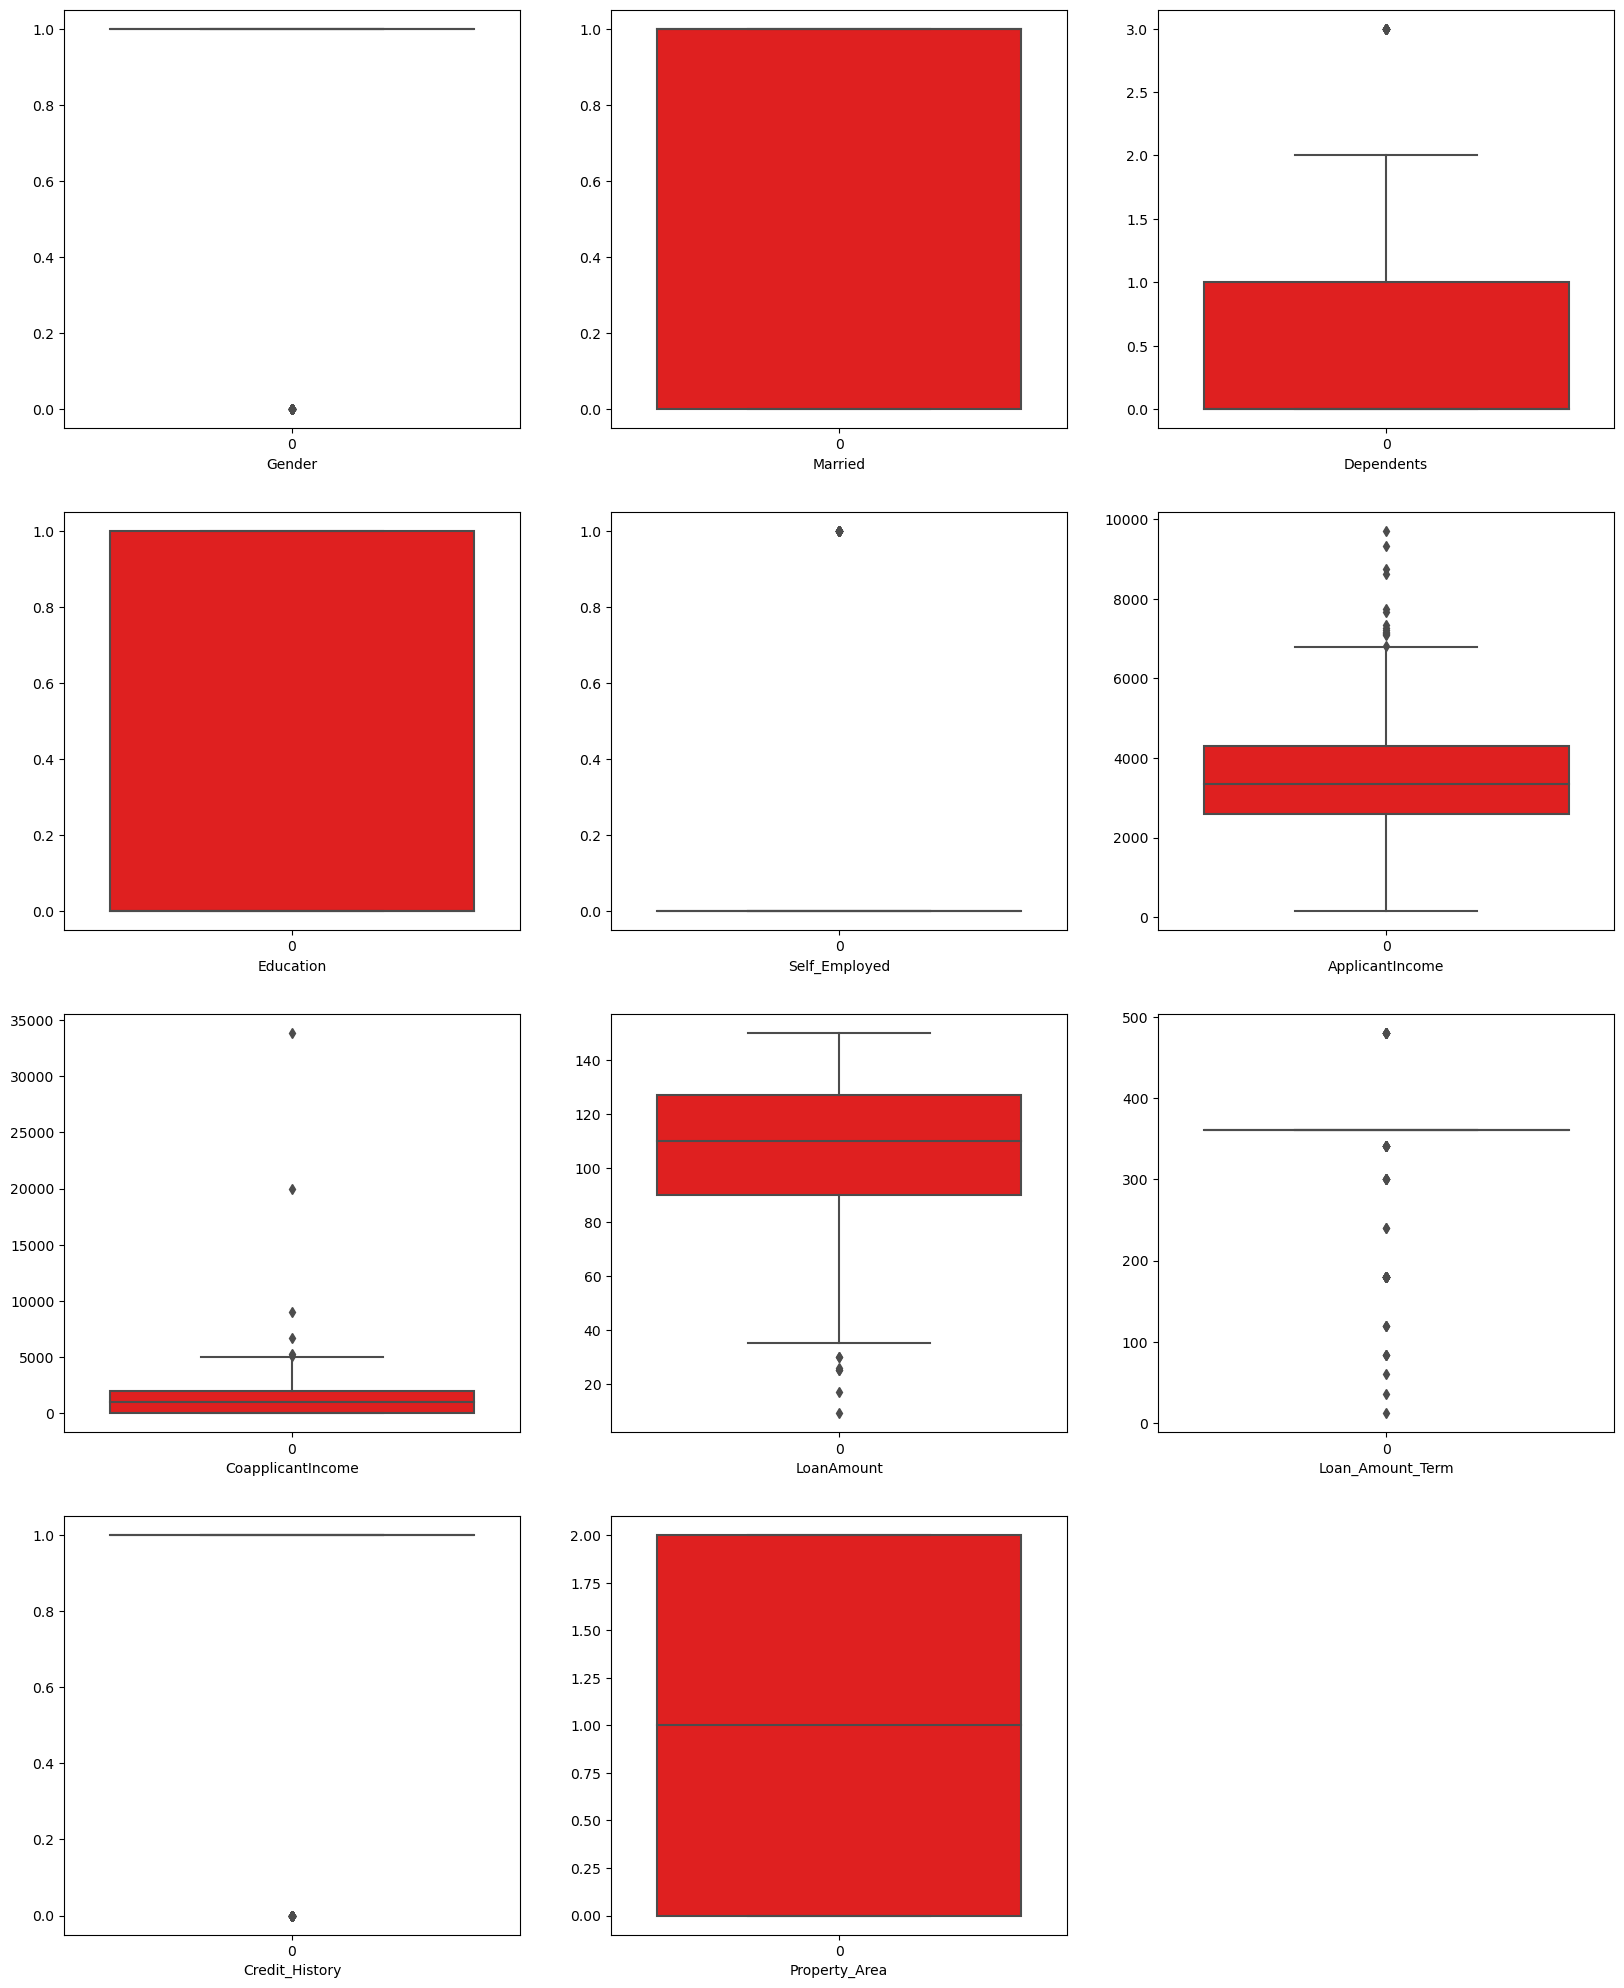

In [315]:
#checking ouliers
plt.figure(figsize=(20,25), facecolor='white')
pltnum=1
for col in df:
    if pltnum<12:
        ax=plt.subplot(4,3,pltnum)
        sns.boxplot(df[col],color='red')
        plt.xlabel(col,fontsize=10)
    pltnum+=1
plt.show()

# Removing Skewness

In [316]:
from sklearn.preprocessing import power_transform
skewed = ['CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Credit_History', 'Loan_Amount_Term', 'Self_Employed', 'Education', 'Dependents', 'Gender']
for col in skewed:
    df[col]=power_transform((df[col].values.reshape(-1,1)))

In [317]:
df.skew()

Gender              -1.335495
Married             -0.403147
Dependents           0.582993
Education            1.038274
Self_Employed        2.837288
ApplicantIncome      0.129511
CoapplicantIncome   -0.105224
LoanAmount          -0.226333
Loan_Amount_Term     0.286039
Credit_History      -1.299428
Property_Area       -0.091709
Loan_Status         -0.936181
dtype: float64

Removing Ouliers

In [318]:
from scipy.stats import zscore

In [319]:
outlier_col =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [320]:
z = np.abs(zscore(df[outlier_col]))
threshold=3
df_new=df[(z<3).all(axis=1)]

In [321]:
df_new.shape

(366, 12)

In [322]:

lose=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print('percentage of data lose:', lose)

percentage of data lose: 3.937007874015748


# Correlation

In [323]:
df_new.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.372159,0.223274,0.117195,-0.005687,0.003993,0.231015,0.066371,-0.120407,0.072790,-0.005744,0.035616
Married,0.372159,1.000000,0.383412,0.031299,-0.000726,-0.067077,0.358142,0.144968,-0.115778,-0.028106,0.042831,0.066101
Dependents,0.223274,0.383412,1.000000,0.100441,0.070442,0.118885,0.021516,0.079203,-0.125207,-0.026725,0.062306,-0.034537
Education,0.117195,0.031299,0.100441,1.000000,0.032058,-0.016380,0.019862,-0.019404,-0.121689,-0.008067,-0.095141,-0.060496
Self_Employed,-0.005687,-0.000726,0.070442,0.032058,1.000000,0.219926,-0.125721,0.024932,-0.040273,-0.001394,-0.029016,-0.025818
ApplicantIncome,0.003993,-0.067077,0.118885,-0.016380,0.219926,1.000000,-0.434483,0.319939,-0.041979,0.034206,-0.125927,-0.032624
CoapplicantIncome,0.231015,0.358142,0.021516,0.019862,-0.125721,-0.434483,1.000000,0.222647,-0.004467,-0.008241,0.011849,0.124860
LoanAmount,0.066371,0.144968,0.079203,-0.019404,0.024932,0.319939,0.222647,1.000000,0.121515,-0.022301,-0.167069,0.049552
Loan_Amount_Term,-0.120407,-0.115778,-0.125207,-0.121689,-0.040273,-0.041979,-0.004467,0.121515,1.000000,0.044119,-0.132020,0.016873
Credit_History,0.072790,-0.028106,-0.026725,-0.008067,-0.001394,0.034206,-0.008241,-0.022301,0.044119,1.000000,0.045215,0.449228


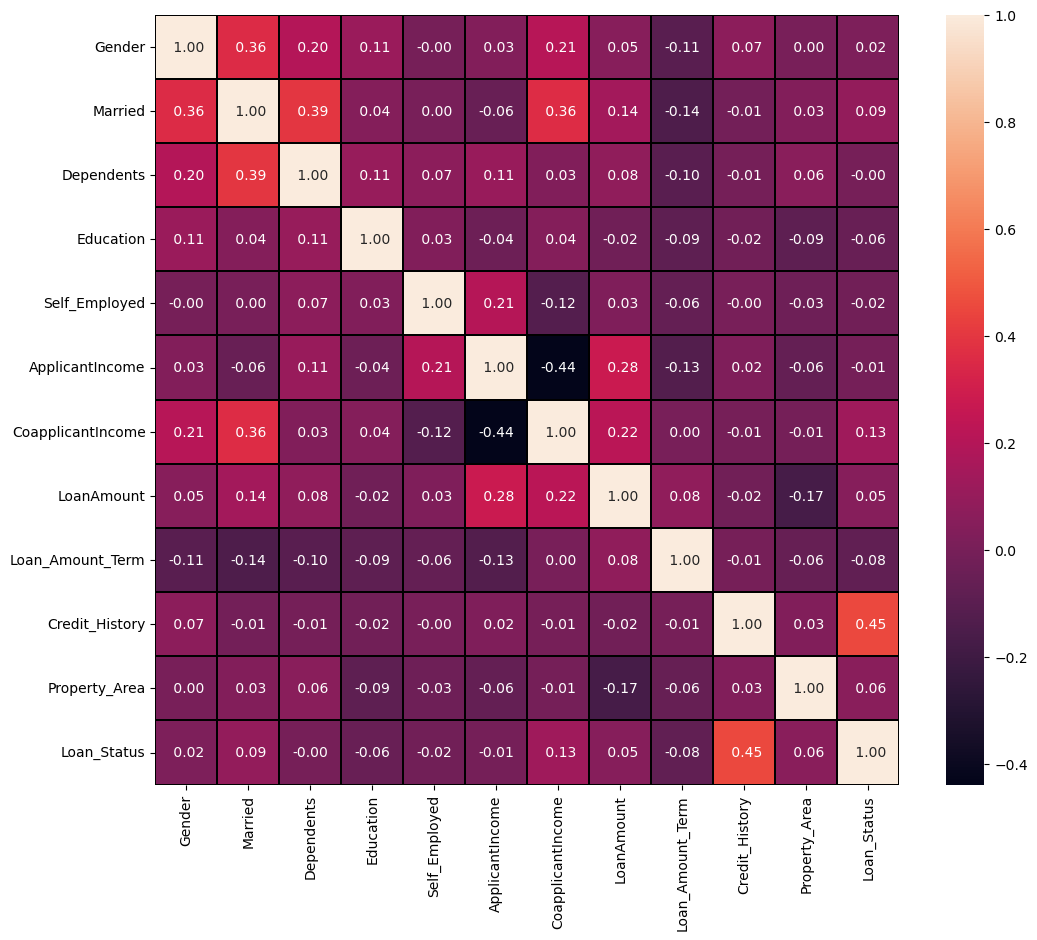

In [324]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt=' .2f')
plt.show()

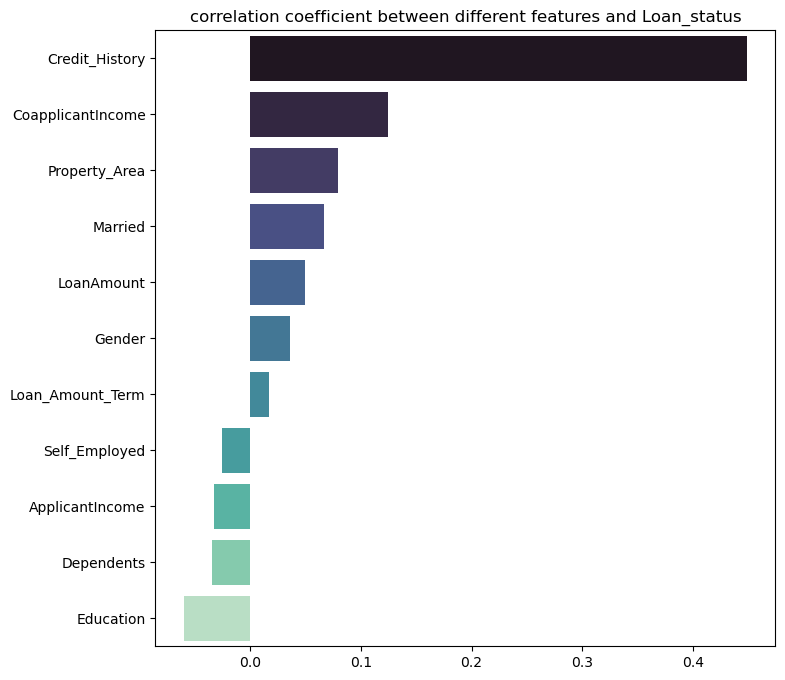

In [325]:
plt.figure(figsize=(8,8))
data=df_new.corr()['Loan_Status'].sort_values(ascending=False)
indices=data.index
labels=[]
corr=[]
for i in range(1,len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
sns.barplot(x=corr,y=labels,palette='mako')
plt.title('correlation coefficient between different features and Loan_status')

plt.show()

In [326]:
# Define features and target variable
X = df_new.drop(columns=['Loan_Status'])
y = df_new['Loan_Status']

x.shape,y.shape

((366, 11), (366,))

In [327]:
st=StandardScaler()
X=st.fit_transform(x)
X=pd.DataFrame(X,columns=x.columns)

In [328]:
# Check for missing and infinite values
X_original = X.copy() 
print("Missing values in X:")
print(X.isnull().sum())

print("Infinite values in X:")
print(np.isinf(X).sum())

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Choose the strategy as per your data
X = imputer.fit_transform(X)

# Replace infinite values with NaN
X = pd.DataFrame(X).replace([np.inf, -np.inf], np.nan)

# Re-impute NaN values if any remain
X = imputer.fit_transform(X)


# Convert back to DataFrame to retain column names
X = pd.DataFrame(X, columns=X_original.columns)

# Recalculate VIF
vif = pd.DataFrame()
vif["Features List"] = X.columns
vif["VIF Value"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Missing values in X:
Gender               0
Married              0
Dependents           7
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64
Infinite values in X:
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64
        Features List  VIF Value
0              Gender   1.230984
1             Married   1.476071
2          Dependents   1.239539
3           Education   1.050416
4       Self_Employed   1.058007
5     ApplicantIncome   1.716578
6   CoapplicantIncome   1.738563
7          LoanAmount   1.425501
8    Loan_Amount_Term   1.093083
9      Credit_History   1.018690
10      Property_Area   1.076812


# MODEL BUILDING

In [329]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [330]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=30)

In [359]:
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),AdaBoostClassifier(),ExtraTreesClassifier(),DecisionTreeClassifier()]

In [332]:
maxAccu=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxrs=i
print('Best accuracy is', maxAccu*100 ,'on Random_state', maxrs)
    

Best accuracy is 90.54054054054053 on Random_state 36


In [333]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=142)

In [334]:
print(x_train.shape,y_train.shape)

(292, 11) (292,)


In [335]:
print(x_test.shape,y_test.shape)

(74, 11) (74,)


In [360]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('Evaluation Metrics of ',m,'is :')
    print('\n')
    print('Accuracy score :\n',accuracy_score(y_test,pred))
    print('\n')
    print('Confusion matrix :\n',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report :\n',classification_report(y_test, y_pred))
    print('='*100)
    

Evaluation Metrics of  LogisticRegression() is :


Accuracy score :
 0.7972972972972973


Confusion matrix :
 [[10 11]
 [ 4 49]]


Classification Report :
               precision    recall  f1-score   support

           0       0.17      0.10      0.12        21
           1       0.69      0.81      0.75        53

    accuracy                           0.61        74
   macro avg       0.43      0.45      0.43        74
weighted avg       0.54      0.61      0.57        74

Evaluation Metrics of  SVC() is :


Accuracy score :
 0.7972972972972973


Confusion matrix :
 [[ 9 12]
 [ 3 50]]


Classification Report :
               precision    recall  f1-score   support

           0       0.17      0.10      0.12        21
           1       0.69      0.81      0.75        53

    accuracy                           0.61        74
   macro avg       0.43      0.45      0.43        74
weighted avg       0.54      0.61      0.57        74

Evaluation Metrics of  KNeighborsClassifier() is 

Here Logistic regression gives 0.79 accuracy score

# Cross Validation

In [361]:
for m in model:
    score=cross_val_score(m,X,y,cv=5)
    print('\n')
    print('Cross Validation Score of ',m,':')
    print('Score :',score)
    print('Mean Score :',score.mean())
    print('Standard deviation :',score.std())
    print('='*100)



Cross Validation Score of  LogisticRegression() :
Score : [0.77027027 0.7260274  0.78082192 0.83561644 0.79452055]
Mean Score : 0.7814513143280266
Standard deviation : 0.03550179713101211


Cross Validation Score of  SVC() :
Score : [0.74324324 0.71232877 0.73972603 0.82191781 0.83561644]
Mean Score : 0.7705664568678268
Standard deviation : 0.04890353765675406


Cross Validation Score of  KNeighborsClassifier() :
Score : [0.74324324 0.67123288 0.75342466 0.83561644 0.73972603]
Mean Score : 0.7486486486486487
Standard deviation : 0.05232253822125757


Cross Validation Score of  GradientBoostingClassifier() :
Score : [0.71621622 0.7260274  0.78082192 0.73972603 0.78082192]
Mean Score : 0.7487226952980378
Standard deviation : 0.027252185013877262


Cross Validation Score of  RandomForestClassifier() :
Score : [0.75675676 0.71232877 0.75342466 0.75342466 0.76712329]
Mean Score : 0.7486116253239541
Standard deviation : 0.018824458378617875


Cross Validation Score of  AdaBoostClassifier()

# Hyper para Meter Tuning

In [362]:
param = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

In [363]:
grid=GridSearchCV(estimator=LogisticRegression(),param_grid=param,cv=5)
grid.fit(X,y)
print(grid)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']})


In [368]:
print(grid.best_score_*100)
print(grid.best_params_)

79.23361717882266
{'C': 0.001, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [365]:
final_model=LogisticRegression(C=1,class_weight=None, max_iter=100, solver='liblinear')

In [375]:
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print('Accuracy score :\n',accuracy_score(y_test,pred)*100)
print('\n')
print('Confusion matrix :\n',confusion_matrix(y_test,pred))
print('\n')
print('Classification Report :\n',classification_report(y_test, y_pred))
    
    

Accuracy score :
 79.72972972972973


Confusion matrix :
 [[10 11]
 [ 4 49]]


Classification Report :
               precision    recall  f1-score   support

           0       0.17      0.10      0.12        21
           1       0.69      0.81      0.75        53

    accuracy                           0.61        74
   macro avg       0.43      0.45      0.43        74
weighted avg       0.54      0.61      0.57        74



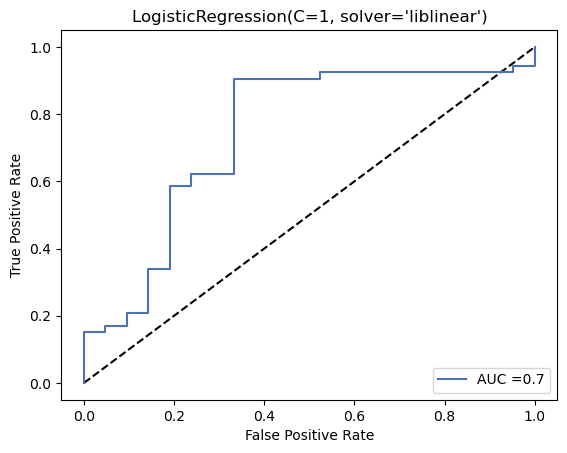

In [343]:
y_pred_prob = final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
auc_score = roc_auc_score(y_test, final_model.predict(x_test))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'AUC ='+str(round(auc_score,2)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.title(final_model)
plt.show()

# Saving Model

In [344]:
import joblib

In [345]:
joblib.dump(final_model,'Loan Application Status Prediction.obj')

['Loan Application Status Prediction.obj']

# Final Prediction

In [346]:
prediction=final_model.predict(x_test)
actual=np.array(y_test)
df_pred=pd.DataFrame()
df_pred['Predicted Values']=prediction
df_pred['Actual Values']=actual
df_pred

,Predicted Values,Actual Values
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
69,1,1
70,0,1
71,1,1
72,1,1


In [347]:
prediction=final_model.predict(x_test)
actual=np.array(y_test)
df_pred=pd.DataFrame()
df_pred['Predicted status']=prediction
df_pred['Actual status']=actual
df_pred

,Predicted status,Actual status
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
69,1,1
70,0,1
71,1,1
72,1,1


In [348]:
df_pred['Predicted status'] = df_pred['Predicted status'].replace({0: 'No', 1: 'Yes'})
df_pred['Actual status'] = df_pred['Actual status'].replace({0: 'No', 1: 'Yes'})


In [349]:
df_pred

,Predicted status,Actual status
0,Yes,No
1,Yes,Yes
2,Yes,Yes
3,No,No
4,Yes,Yes
...,...,...
69,Yes,Yes
70,No,Yes
71,Yes,Yes
72,Yes,Yes


# Thanking You